In [1]:
# ------------importing necessary packages-------------------
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model


## Linear Regression:

In a simple **Linear model** with only **one feature x** the **input-output relationship** can be formulated as:    $$y\space=\space b_{0}+b_{1}x_{1}$$

However, a **dataset** is generally expressed as an **nxd matrix** with each **row** representing a **single datapoint** and each **column** of which representing one of the existing **features**.    
For example, **D** is a dataset of **n samples** each having **d features**:

$$D\space= \space\begin{bmatrix} x_{11} & x_{12} & ... &  x_{1d}\\ x_{21} & x_{22} & ... &  x_{2d} \\ . & . & ... &  .\\ . & . & ... &  .\\ x_{n1} & x_{n2} & ... &  x_{nd}\end{bmatrix}$$

And thus the general formulation of the **input-output relationship** in a **linear model** is defined as follows:  
$$ \mathbf{y} = \mathbf{X} b $$
Where:$y_{nx1}$ is the **outputs vector**, $b_{(d+1)x1}$ is the **coefficients vector**, and $X_{nx(d+1)}$ is the **design matrix** which is built by adding a column of ones to the dataset **D** in order to include the **intercept** $b_{0}$ in the model:

$$X\space= \space\begin{bmatrix} 1 & x_{11} & x_{12} & ... &  x_{1d}\\1 & x_{21} & x_{22} & ... &  x_{2d} \\1 & . & . & ... &  .\\ . & . & ... &  .\\ 1 & x_{n1} & x_{n2} & ... &  x_{nd}\end{bmatrix}$$


The coefficients $b_{0}, b{1}, ..., b_{d}$ are estimated using the data and through optimization and once they've been determined, predictions on the new data or the same used data can be made using the already mentioned x-y relationship function as below:
$$ \hat{\mathbf{y}} = \mathbf{X} \hat{b} $$
where $\hat{b}$ is the estimated coefficients vector and $ \hat{\mathbf{y}}$ is the predicted outputs vector, and $\mathbf{X} $ can be a dataset totally different from the one used for training the model. 
In th below the **linear prediction function** is defined:

In [2]:
# ------------Linear Model Prediction function-------------------
def linearModelPredict(b,X):
    yp = np.dot(X, b)
    return yp

In order to perform optimization, some function are needed to evaluate the performance of the built model, known as **Loss function** and two of the most widely used Loss functions are :
* **L2 norm** also known as **OLS (Ordinary Least Squares)**
* **L1 norm** also known as **LAD (Least Absolute Deviations)**

* **L2 norm**: which is basically the sum of squared-residuals:
$$L2\space=\space\sum_{i=1}^n{(y_{i}-\hat{y_{i}})^2}\space$$


this is implemented as follows, and in this function derivatives with respect to all the coefficients are returned as well:

In [3]:
# ------------Linear Model Loss function-------------------
def linearModelLossRSS(b,X,y):
    # linear prediction
    yp = linearModelPredict(b, X)
    # sum of squared residuals
    res = y - yp
    rss = sum(res ** 2)
    # derivatives of Loss with respect to coefficients
    gradient = -2*np.dot(res, X)
    return rss, gradient

* **L1 norm**: which is  the sum of absolute values of the residuals:
$$L1\space=\space\sum_{i=1}^n{|y_{i}-\hat{y_{i}}|}\space$$


this is implemented as follows, and in this function derivatives with respect to all the coefficients are returned as well:

In [4]:
# ------------Linear Model Fit function (L1)-------------------
def linearModelLossLAD(b,X,y):
    # linear prediction
    yp = linearModelPredict(b, X)
    # sum of absolute residuals
    res = y - yp
    LAD = sum(np.abs(res))
    # derivatives of Loss with respect to coefficients
    gradient = -np.dot(np.sign(res), X)
    return (LAD,gradient)

We also need to optimize the Loss function (L1 or L2) and find the corresponding best coefficients.We define a function that gets as its input arguments the **design matrix**, the **actual outputs vector** as well as the **Loss function** to minimize.  For the purpose of **minimization** we prefer to use the optimization tools provided in the **scipy** library. Other than fitting the data to the model and optimization, this function also returns a criterion known as **R-squared** which is calculated as follows:
$$R^{2} = 1 - \frac{\sum_{i=1}^n{(y_{i}-\hat{y_{i}})^2}}{\sum_{i=1}^n{(y_{i}-\bar{y})^2}} = 1- \frac{residual\space sum\space of \space squares\space }{total\space sum\space of \space squares} = 1 - \frac{RSS}{TSS}$$
where:
$$\bar{y}\space=\space \frac{1}{n} \sum_{i=1}^n{y_{i}}$$

* $R^{2}$ is a metric used to show the quality of the fit of the Linear Regression model. l 
* $0 < R^{2} < 1$: The closer the fit is to one, the better the mode


In [5]:
# ------------Linear Model Fit function-------------------
def linearModelFit(X,y,lossfcn):
    bstart = np.zeros(X.shape[1])
    # using the scipy package to minimize the loss function
    RESULT = so.minimize(lossfcn, bstart, args=(X, y), jac=True)
    # getting estimated parameters
    betas_estimated = RESULT.x
    # calling the loss function to calculate loss and gradient 
    # regarding the newly estimated beta values 
    res_mean = y - np.mean(y)
    RSS, gradient = linearModelLossRSS(betas_estimated, X, y)
    TSS = sum(res_mean ** 2)
    R2 = 1-(RSS/TSS)
    return (betas_estimated,R2)

Now we want apply a linear model to a dataset provided by `Lindenmayer`, `Viggers`, `Cunningham` and `Donnelly` in 1995 which represents some information about possums in Australia and New Guinea. 
* This dataset includes 46 datapoints
* Each datapoint has 6 features:
    * sex: Sex, either m (male) or f (female).
    * age: Age in years.
    * headL: Head length, in mm.
    * skullW: Skull width, in mm.
    * totalL: Total length, in cm.
    * tailL: Tail length, in cm.
    
In this examples we aim to investigate and model the relationship between the two features `age` and `tailL` .

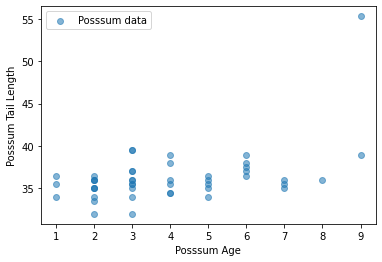

In [6]:
# ------------reading the Possum data as a pandas dataFrame-------------------
possum_data = pd.read_csv(r'possum.csv')

# ------------scatter plotting Age vs Tail Length-------------------
plt.scatter(possum_data.age, possum_data.tailL,  alpha=0.55, label='Posssum data')
plt.xlabel('Posssum Age')
plt.ylabel('Posssum Tail Length')
plt.legend()
plt.show()

Now if we wanted to apply a Linear Model to this data using both `L2` and `L1` norms. 

Coefficients:
  b0: 33.35046602968987
  b1: 0.7537283652232095
R2: 0.22286587947604142


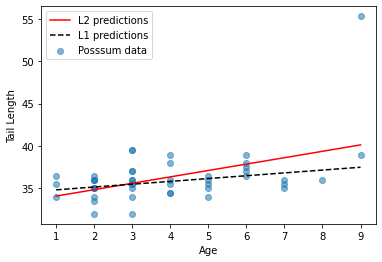

In [7]:
# ------------getting data : age and tailL columns -------------------
age = possum_data.age.values
y = possum_data.tailL.values
N = age.size
X = np.c_[np.ones(N), age]

# ------------fitting the data to the L2 Linear Model-------------------
betas_estimated, R2 = linearModelFit(X, y, linearModelLossRSS)
print('Coefficients:')
print(f'  b0: {betas_estimated[0]}')
print(f'  b1: {betas_estimated[1]}')
print(f'R2: {R2}')

# ------------using L2 estimated parameters to make predictions on new data-------------------
# new data
age_grid = np.linspace(age.min(), age.max(), 10)
# design matrix 
Xn = np.c_[np.ones(age_grid.size), age_grid]
# predictions on new data using the estimated parameters 
yn = linearModelPredict(betas_estimated, Xn)

# ------------scatter plotting training data (age vs tailL)-------------------
plt.scatter(possum_data.age, possum_data.tailL,  alpha=0.55, label='Posssum data')
plt.xlabel('Age')
plt.ylabel('Tail Length')
plt.legend()

# ------------plotting L2 predictions on the new data-------------------
plt.plot(age_grid, yn, color='r', label='L2 predictions')

# ------------fitting the data to L1 Linear Model-------------------
betas_estimated, R2 = linearModelFit(X, y, linearModelLossLAD)
 
# ------------using L1 estimated parameters to make predictions on new data------------------- 
yn = linearModelPredict(betas_estimated, Xn)

# ------------plotting L1 predictions on the new data-------------------
plt.plot(age_grid, yn, 'k--', label='L1 predictions')
plt.legend()
plt.show()

It can be seen that `L1 predictions` are `less influenced by the outlier datapoints` as the `L1 norm` is based on the `median` 

An easier way of applying linear models is to `sklearn` package in which all of the above function are already implemeneted.
For example, here Linear regression with L2 loss is used to perform the above tasks.


R2 using sklearn: 0.22


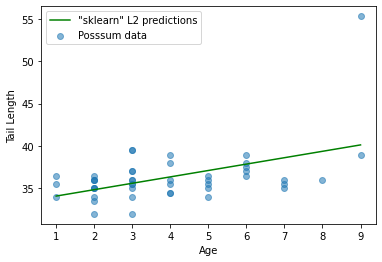

In [10]:
# ------------scatter plotting training data (age vs tailL)-------------------
plt.scatter(possum_data.age, possum_data.tailL,  alpha=0.55, label='Posssum data')
plt.xlabel('Age')
plt.ylabel('Tail Length')
plt.legend()
# ------------fitting the data to "sklearn" L2 Linear Model-------------------
ols_fit = linear_model.LinearRegression().fit(X, y)
R2 = ols_fit.score(X, y)
print(f"R2 using sklearn: {np.round(R2, 2)}")

# ------------using "sklearn" L2 fitted model to make predictions on new data-------------------
y_pred_ols = ols_fit.predict(Xn)

# ------------plotting "sklearn" L2 predictions on the new data-------------------
plt.plot(age_grid, y_pred_ols, 'g', label='"sklearn" L2 predictions')
plt.legend()
plt.show()